In [1]:
from preprocess_train_val import *
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, LSTM
from tensorflow.keras.utils import to_categorical
import wandb
from wandb.keras import WandbCallback
import matplotlib.pyplot as plt
import os
import pandas as pd
import sklearn
import librosa.display

In [2]:
print(DATA_PATH)

../data/train_validate_bal/


In [3]:
wandb.init()
config = wandb.config

config.max_len = 170
config.buckets = 20

# Save data to array file first
save_data_to_array(max_len=config.max_len, n_mfcc=config.buckets)

labels=["firearm_bal", "nonfirearm_bal"]

Saving vectors of label - 'nonfirearm_bal':   0%|          | 0/440 [00:00<?, ?it/s]

The number of labels is:  2


Saving vectors of label - 'firearm_bal':   4%|▍         | 20/451 [00:03<01:19,  5.42it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'firearm_bal':   5%|▌         | 23/451 [00:03<01:10,  6.10it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'firearm_bal':  10%|█         | 46/451 [00:07<00:44,  9.01it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'firearm_bal':  14%|█▎        | 62/451 [00:09<00:45,  8.61it/s]/opt/anacon

Saving vectors of label - 'firearm_bal':  58%|█████▊    | 261/451 [00:39<00:25,  7.38it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'firearm_bal':  60%|██████    | 271/451 [00:41<00:32,  5.51it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'firearm_bal':  63%|██████▎   | 283/451 [00:43<00:35,  4.70it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'firearm_bal':  63%|██████▎   | 284/451 [00:43<00:37,  4.47it/s]/opt/an

Saving vectors of label - 'firearm_bal':  95%|█████████▌| 430/451 [01:06<00:02,  7.97it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'firearm_bal':  99%|█████████▉| 447/451 [01:09<00:00,  5.64it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'firearm_bal':  99%|█████████▉| 448/451 [01:09<00:00,  5.81it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'firearm_bal': 100%|██████████| 451/451 [01:10<00:00,  6.44it/s]


* There are 440 files for training and validation pertaining to the **nonfirearm** class
* There are 451 audio files for training/validation belonging to the **firearm** class
* Together, the total sum of data for training/validation amounts to 891 audio files


* 25% of this value will be split into a dataset for validation, that is 268 data files
* The remainder, 75%, will be split into a dataset for training, that is 623 data files

In [4]:
# # Loading train set and validation set
X_train, X_val, y_train, y_val = get_train_validation()

The number of labels is:  2


In [5]:
print(X_train.shape)

(668, 20, 170)


In [6]:
# # Feature dimension
channels = 1
config.epochs = 50 # hyperparameter
config.batch_size = 100 # hyperparameter

num_classes = 2

X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len, channels)
X_val = X_val.reshape(X_val.shape[0], config.buckets, config.max_len, channels)

In [7]:
X_train.shape

(668, 20, 170, 1)

In [8]:
X_val.shape

(223, 20, 170, 1)

In [9]:
y_train.shape

(668,)

In [10]:
c=0
for element in y_train:
    if element==0:
        print(c)
    c+=1

0
2
4
5
6
7
9
10
11
15
17
18
20
22
25
27
28
29
30
35
36
39
44
47
49
50
52
54
57
58
59
61
62
63
65
69
70
71
72
75
77
79
80
81
82
84
87
88
90
92
93
96
97
98
99
100
104
105
108
109
112
113
114
115
118
119
122
129
132
133
136
137
140
141
142
143
145
146
152
153
154
155
156
157
158
163
167
171
172
174
176
177
178
179
183
184
187
188
190
191
192
193
194
199
202
203
204
208
209
212
213
216
217
219
220
223
224
226
227
229
230
231
235
237
238
240
241
246
247
249
254
255
257
258
259
260
261
262
263
266
267
270
272
274
276
282
283
284
285
286
288
289
291
292
294
296
298
299
303
305
306
307
312
313
315
316
317
318
321
322
324
325
333
335
337
338
340
346
348
349
351
353
354
355
357
362
370
372
376
377
379
380
381
383
384
385
386
388
391
393
395
396
401
403
404
405
410
411
415
417
418
419
422
424
426
427
428
429
430
431
432
433
434
436
438
442
450
453
457
458
462
465
468
470
472
473
476
477
478
479
483
496
497
499
501
503
508
510
516
517
518
520
521
529
532
534
535
536
537
538
540
542
543
544
546
54

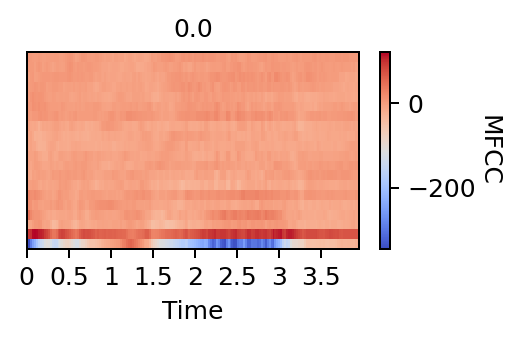

In [12]:
num=0
plt.figure(figsize=(3,2),dpi=180)
librosa.display.specshow(X_train[num, :, :, 0],x_axis='time')
plt.title(str(y_train[num]),fontsize=10)
cbar=plt.colorbar()
cbar.set_label('MFCC',rotation=270,fontsize=10,labelpad=10)
plt.tight_layout()
plt.savefig('../reports/figures/'+'MFCC_'+str(num)+'.png')

In [13]:
y_train_hot = to_categorical(y_train)
y_val_hot = to_categorical(y_val)

In [14]:
pd.DataFrame(y_train_hot).sum()

0    326.0
1    342.0
dtype: float32

In [15]:
pd.DataFrame(y_val_hot).sum()

0    114.0
1    109.0
dtype: float32

Here, the nonfirearm sounds correspond to the 0th row.  In the 0th row, values of one indicate nonfirearm sounds. 

In the first row, values of one pertain to firearm sounds, and zeros belong to nonfirearm sounds.  

In [16]:
X_train = X_train.reshape(X_train.shape[0], config.buckets, config.max_len)
X_val = X_val.reshape(X_val.shape[0], config.buckets, config.max_len)

model = Sequential()
model.add(Flatten(input_shape=(config.buckets, config.max_len)))
model.add(Dense(num_classes, activation='softmax'))

opt = keras.optimizers.Adam(learning_rate=.05) #optimizer

model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3400)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 6802      
Total params: 6,802
Trainable params: 6,802
Non-trainable params: 0
_________________________________________________________________


In [18]:
wandb.init()
history1=model.fit(X_train, y_train_hot, epochs=config.epochs, validation_data=(X_val, y_val_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])


Epoch 1/50
21/21 [==============================] - 0s 21ms/step - loss: 1266.6713 - accuracy: 0.6886 - val_loss: 560.7993 - val_accuracy: 0.9013
Epoch 2/50
21/21 [==============================] - 0s 8ms/step - loss: 474.4134 - accuracy: 0.8473 - val_loss: 287.4224 - val_accuracy: 0.8744
Epoch 3/50
21/21 [==============================] - 0s 7ms/step - loss: 183.8688 - accuracy: 0.9072 - val_loss: 218.5283 - val_accuracy: 0.8834
Epoch 4/50
21/21 [==============================] - 0s 8ms/step - loss: 113.9594 - accuracy: 0.9192 - val_loss: 191.4368 - val_accuracy: 0.9013
Epoch 5/50
21/21 [==============================] - 0s 7ms/step - loss: 80.8882 - accuracy: 0.9177 - val_loss: 175.8523 - val_accuracy: 0.8924
Epoch 6/50
21/21 [==============================] - 0s 8ms/step - loss: 69.4002 - accuracy: 0.9371 - val_loss: 480.5946 - val_accuracy: 0.7444
Epoch 7/50
21/21 [==============================] - 0s 7ms/step - loss: 68.9381 - accuracy: 0.9371 - val_loss: 155.7250 - val_accuracy: 

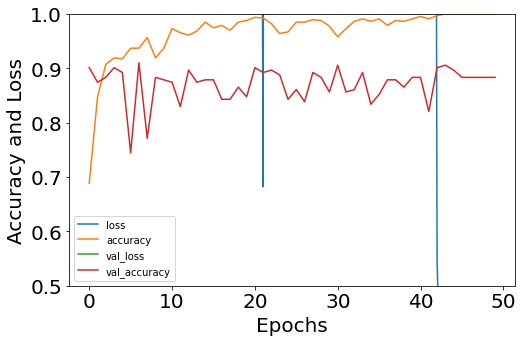

wandb: ERROR Error uploading "media/images/examples_38.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmpohi8fqsqwandb/1rm3xn22-media/images/examples_38.png size shrank from 71962 to 0 while it was being uploaded.
wandb: ERROR Error uploading "media/images/examples_36.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmpohi8fqsqwandb/1h43gbt3-media/images/examples_36.png size shrank from 65889 to 0 while it was being uploaded.
wandb: ERROR Error uploading "media/images/examples_39.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmpohi8fqsqwandb/8hkrpco3-media/images/examples_39.png size shrank from 63295 to 0 while it was being uploaded.
wandb: ERROR Error uploading "media/images/examples_37.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmpohi8fqsqwandb/3li8hegp-media/images/examples_37.png size shrank from 68602 to 0 while it was being uploaded.
wandb: ERROR Error uploading "media/images/examp

In [19]:
pd.DataFrame(history1.history).plot(figsize=(8,5),fontsize=20)
# plt.grid(True)
plt.gca().set_ylim(.5,1)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy and Loss',fontsize=20)
plt.show();

## Test the Sequential NN with some Test Data

In [20]:
from preprocess_test import *

In [21]:
print(DATA_PATH_TEST)

../data/test_bal/


In [24]:
save_data_to_array(max_len=config.max_len, n_mfcc=config.buckets)
labels=["firearm_test_bal", "nonfirearm_test_bal"]

Saving vectors of label - 'nonfirearm_test_bal':   1%|          | 1/110 [00:00<00:17,  6.25it/s]

The number of labels is:  2


Saving vectors of label - 'firearm_test_bal':   2%|▏         | 2/111 [00:00<00:07, 14.68it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'firearm_test_bal':   5%|▍         | 5/111 [00:00<00:10,  9.70it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'firearm_test_bal':   6%|▋         | 7/111 [00:00<00:13,  7.48it/s]/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')
Saving vectors of label - 'firearm_test_bal':  13%|█▎        | 14/111 [00:01<00:13,  6.9

In [26]:
x_non = np.load(labels[1] + '.npy')
print('The number of non firearms',len(x_non))
x_fa= np.load(labels[0] + '.npy')
print('The number of firearms',len(x_fa))

The number of non firearms 110
The number of firearms 111


In [27]:
X_test, X_none, y_test, y_none = get_test()

The number of labels is:  2


In [28]:
print(X_test.shape)
print(y_test.shape)
print(X_none.shape)
print(y_none.shape)

(198, 20, 170)
(198,)
(23, 20, 170)
(23,)


In [29]:
X_test=np.concatenate((X_test,X_none),axis=0)
Y_test=np.concatenate((y_test,y_none),axis=0)
print(X_test.shape)
print(Y_test.shape)

(221, 20, 170)
(221,)


In [30]:
X_test = X_test.reshape(X_test.shape[0], config.buckets, config.max_len, channels)
print(X_test.shape)

(221, 20, 170, 1)


In [31]:
Y_test_hot = to_categorical(Y_test)
print(Y_test_hot.shape)

(221, 2)


In [32]:
pd.DataFrame(Y_test_hot).sum()

0    110.0
1    111.0
dtype: float32

This corresponds to the patterns above, where the ones in the 0th row correspond to nonfirearm sounds, and ones in the 1st row correspond to firearm sounds. 

In [33]:
m_eval=model.evaluate(X_test, np.abs(Y_test_hot))
accuracy=round(m_eval[1]*100,1)
print('\nThe accuracy is:', accuracy,'%')

7/7 [==============================] - 0s 986us/step - loss: 255.7926 - accuracy: 0.9005

The accuracy is: 90.0 %


In [34]:
Y_predict=model.predict(X_test)

In [35]:
pd.DataFrame(Y_predict.round())

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
216,0.0,1.0
217,1.0,0.0
218,0.0,1.0
219,1.0,0.0


In [36]:
pd.DataFrame(Y_predict.round()).sum()

0    100.0
1    121.0
dtype: float32

In [37]:
pd.DataFrame(Y_test_hot).sum()

0    110.0
1    111.0
dtype: float32

In [38]:
pd.DataFrame(y_train_hot).sum()

0    326.0
1    342.0
dtype: float32

In [39]:
Y_test_hot[:,0:1].sum()

110.0

In [40]:
Y_test_hot[:,1].sum()

111.0

In [63]:
import sklearn
conf_mat1=sklearn.metrics.confusion_matrix(pd.DataFrame(Y_test_hot)[1],pd.DataFrame(Y_predict).round()[1])

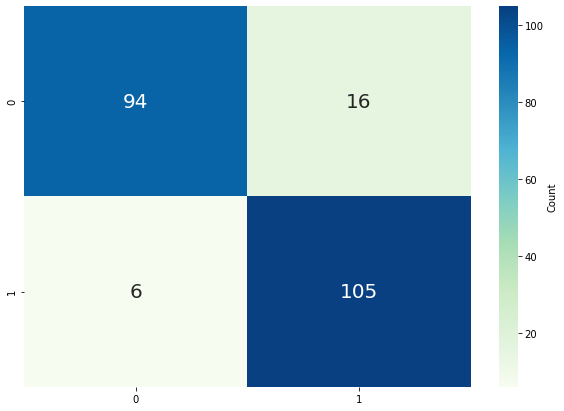

wandb: ERROR Error uploading "model-best.h5": CommError, File /Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/notebooks/wandb/run-20200623_102323-1qsow48j/model-best.h5 size shrank from 37199512 to 37068440 while it was being uploaded.


In [64]:
import seaborn as sn 

df_cm = pd.DataFrame(conf_mat1, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True,annot_kws={"size": 20},cmap="GnBu",cbar_kws={'label': 'Count'},fmt='d')


* The element, c$_{0,0}$, is equal to 94.  This indicates that there are 94 true negatives.
* The element, c$_{1,0}$, is equal to 6.  This indicates that there are 6 false negatives.
* The element, c$_{0,1}$, is equal to 16.  This indicates that there are 16 false positives. 
* The element, c$_{1,1}$, is equal to 105.  Thus, there are 105 true positives. 

In the context of predicting firearms, the presence of false negatives is grave.  This means that the 6 sounds were actually the sounds of firearms, but it was predicted that they were not. 

In [47]:
models_path='../models/'
filename = 'bal_seq_nn_model'+str(accuracy)+'_accuracy.h5'
nn_model = models_path+filename

print(nn_model)
model.save(nn_model)

../models/bal_seq_nn_model90.0_accuracy.h5


## Adding Convolution 

In [65]:
#input_shape=(batch_size, channels, rows, cols)
alpha=0.0001
input_shape=(20,170,1)

model2 = Sequential()
model2.add(Conv2D(32,(2,2),
                 input_shape=input_shape,
                 activation='relu',
                 data_format='channels_last'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))

opt2 = keras.optimizers.Adam(learning_rate=alpha)

model2.compile(loss="categorical_crossentropy",
              optimizer=opt2,
              metrics=['accuracy'])

In [66]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 19, 169, 32)       160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 84, 32)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 24192)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3096704   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 3,097,122
Trainable params: 3,097,122
Non-trainable params: 0
_________________________________________________________________


In [67]:
print(X_train.shape)
print(np.reshape(X_train,(668,20,170,1)).shape)
X_train2=np.reshape(X_train,(668,20,170,1))
print(y_train_hot.shape)
print(X_val.shape)
X_val2=np.reshape(X_val,(223,20,170,1))
print(X_val2.shape)
print(y_val_hot.shape)
print(config.buckets)
print(config.max_len)
print(channels)

(668, 20, 170)
(668, 20, 170, 1)
(668, 2)
(223, 20, 170)
(223, 20, 170, 1)
(223, 2)
20
170
1


In [68]:
history2=model2.fit(X_train2, y_train_hot, epochs=config.epochs, validation_data=(X_val2, y_val_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

Epoch 1/50
21/21 [==============================] - 1s 43ms/step - loss: 5.8641 - accuracy: 0.8144 - val_loss: 1.4614 - val_accuracy: 0.9372
Epoch 2/50
21/21 [==============================] - 1s 35ms/step - loss: 0.9115 - accuracy: 0.9281 - val_loss: 1.1697 - val_accuracy: 0.9148
Epoch 3/50
21/21 [==============================] - 1s 33ms/step - loss: 0.7832 - accuracy: 0.9237 - val_loss: 1.0934 - val_accuracy: 0.9193
Epoch 4/50
21/21 [==============================] - 1s 30ms/step - loss: 0.2450 - accuracy: 0.9581 - val_loss: 1.4028 - val_accuracy: 0.8879
Epoch 5/50
21/21 [==============================] - 1s 31ms/step - loss: 0.5044 - accuracy: 0.9461 - val_loss: 2.2406 - val_accuracy: 0.8161
Epoch 6/50
21/21 [==============================] - 1s 33ms/step - loss: 0.2357 - accuracy: 0.9611 - val_loss: 0.6333 - val_accuracy: 0.9507
Epoch 7/50
21/21 [==============================] - 1s 29ms/step - loss: 0.0749 - accuracy: 0.9805 - val_loss: 0.9833 - val_accuracy: 0.9327
Epoch 8/50
21

Retry attempt failed:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connectionpool.py", line 677, in urlopen
    chunked=chunked,
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/http/client.py", line 1344, in getresponse
    response.begin()
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/http/client.py", line 275, in _read_status
    raise RemoteDisconnected("Remote end closed connection without"
http.client.RemoteDisconn

wandb: Network error (ReadTimeout), entering retry loop. See /Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/notebooks/wandb/debug.log for full traceback.
Retry attempt failed:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connectionpool.py", line 677, in urlopen
    chunked=chunked,
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/http/client.py", line 1344, in getresponse
    response.begin()
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason = self.

wandb: Network error (TransientException), entering retry loop. See /Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/notebooks/wandb/debug.log for full traceback.
wandb: Network error resolved after 0:00:29.489112, resuming normal operation.
wandb: Network error resolved after 0:00:32.512626, resuming normal operation.
wandb: Network error resolved after 0:00:28.854672, resuming normal operation.
wandb: Network error resolved after 0:00:30.297098, resuming normal operation.
wandb: ERROR Error uploading "media/images/examples_36.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmped6k_k81wandb/1sqh9wpp-media/images/examples_36.png size shrank from 73794 to 0 while it was being uploaded.
wandb: Network error resolved after 0:00:30.966515, resuming normal operation.
wandb: Network error resolved after 0:00:31.040619, resuming normal operation.


In [69]:
m2_eval=model2.evaluate(X_test, np.abs(Y_test_hot))
accuracy2=round(m2_eval[1]*100,1)
print('\nThe accuracy is:', accuracy2,'%')

7/7 [==============================] - 0s 8ms/step - loss: 0.1811 - accuracy: 0.9774

The accuracy is: 97.7 %


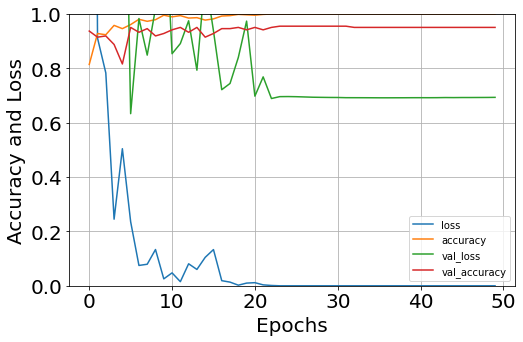

<Figure size 432x288 with 0 Axes>

In [70]:
pd.DataFrame(history2.history).plot(figsize=(8,5),fontsize=20)
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy and Loss',fontsize=20)
plt.show();
plt.savefig('../reports/CNN_'+'alpha_'+str(alpha)+'_'+str(accuracy2)+'.png')

In [71]:
models_path='../models/'
filename = 'bal_cnn_model_accuracy_' +str(accuracy2)+'_alpha_'+str(alpha)+'.h5'
cnn_model = models_path+filename

print(cnn_model)
model2.save(cnn_model)

../models/bal_cnn_model_accuracy_97.7_alpha_0.0001.h5


In [72]:
Y_predict2=model2.predict(X_test)

In [73]:
conf_mat2=sklearn.metrics.confusion_matrix(pd.DataFrame(Y_test_hot)[1],pd.DataFrame(Y_predict2).round()[1])

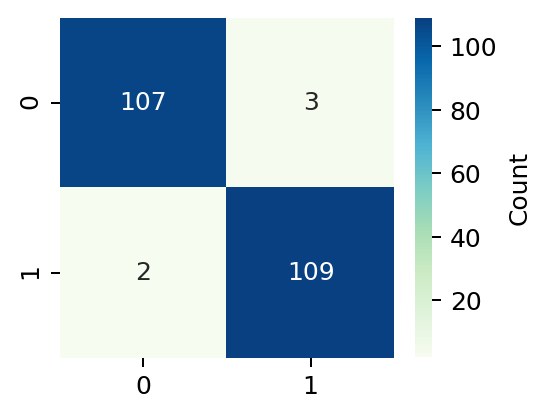

In [74]:
df_cm = pd.DataFrame(conf_mat2, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (3,2.5),dpi=180)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 10},cmap="GnBu",cbar_kws={'label': 'Count'},fmt='d')
plt.savefig('../reports/figures/CNN_confusion_mat_'+str(accuracy2)+'_alpha_'+str(alpha)+'.png')

## Using a Different Metric in the CNN

In [89]:
#input_shape=(batch_size, channels, rows, cols)
alpha3=0.0001
input_shape=(20,170,1)

model3 = Sequential()
model3.add(Conv2D(32,(2,2),
                 input_shape=input_shape,
                 activation='relu',
                 data_format='channels_last'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dense(num_classes, activation='softmax'))

opt3 = keras.optimizers.Adam(learning_rate=alpha)

model3.compile(loss="categorical_crossentropy",
              optimizer=opt3,
              metrics=tf.keras.metrics.Recall(thresholds=0))

In [90]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 19, 169, 32)       160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 84, 32)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 24192)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               3096704   
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 258       
Total params: 3,097,122
Trainable params: 3,097,122
Non-trainable params: 0
_________________________________________________________________


In [91]:
history3=model3.fit(X_train2, y_train_hot, epochs=config.epochs, validation_data=(X_val2, y_val_hot), callbacks=[WandbCallback(data_type="image", labels=labels)])

Epoch 1/50


Failed to connect to W&B servers after 10 seconds.                    Letting user process proceed while attempting to reconnect.


21/21 [==============================] - 1s 42ms/step - loss: 5.9358 - recall_2: 0.9985 - val_loss: 2.0779 - val_recall_2: 1.0000
Epoch 2/50
21/21 [==============================] - 1s 28ms/step - loss: 0.9724 - recall_2: 1.0000 - val_loss: 0.9155 - val_recall_2: 1.0000
Epoch 3/50
 7/21 [=========>....................] - ETA: 0s - loss: 0.2672 - recall_2: 1.0000

wandb: Network error resolved after 0:00:11.673610, resuming normal operation.


21/21 [==============================] - 1s 29ms/step - loss: 0.2700 - recall_2: 1.0000 - val_loss: 0.6053 - val_recall_2: 1.0000
Epoch 4/50
21/21 [==============================] - 1s 29ms/step - loss: 0.1066 - recall_2: 1.0000 - val_loss: 0.5206 - val_recall_2: 1.0000
Epoch 5/50
21/21 [==============================] - 1s 28ms/step - loss: 0.0886 - recall_2: 1.0000 - val_loss: 0.4984 - val_recall_2: 1.0000
Epoch 6/50
21/21 [==============================] - 1s 28ms/step - loss: 0.0425 - recall_2: 1.0000 - val_loss: 0.4571 - val_recall_2: 1.0000
Epoch 7/50
21/21 [==============================] - 1s 32ms/step - loss: 0.0349 - recall_2: 1.0000 - val_loss: 0.4413 - val_recall_2: 1.0000
Epoch 8/50
21/21 [==============================] - 1s 25ms/step - loss: 0.0155 - recall_2: 1.0000 - val_loss: 0.4786 - val_recall_2: 1.0000
Epoch 9/50
21/21 [==============================] - 1s 39ms/step - loss: 0.0065 - recall_2: 1.0000 - val_loss: 0.4363 - val_recall_2: 1.0000
Epoch 10/50
21/21 [=====

wandb: Network error resolved after 0:00:27.075692, resuming normal operation.


21/21 [==============================] - 1s 28ms/step - loss: 0.0013 - recall_2: 1.0000 - val_loss: 0.4285 - val_recall_2: 1.0000
Epoch 12/50
21/21 [==============================] - 1s 25ms/step - loss: 8.0585e-04 - recall_2: 1.0000 - val_loss: 0.4364 - val_recall_2: 1.0000
Epoch 13/50
21/21 [==============================] - 1s 26ms/step - loss: 5.7821e-04 - recall_2: 1.0000 - val_loss: 0.4368 - val_recall_2: 1.0000
Epoch 14/50
21/21 [==============================] - 1s 25ms/step - loss: 5.2257e-04 - recall_2: 1.0000 - val_loss: 0.4372 - val_recall_2: 1.0000
Epoch 15/50
21/21 [==============================] - 1s 29ms/step - loss: 4.9928e-04 - recall_2: 1.0000 - val_loss: 0.4397 - val_recall_2: 1.0000
Epoch 16/50
21/21 [==============================] - 1s 26ms/step - loss: 4.7953e-04 - recall_2: 1.0000 - val_loss: 0.4413 - val_recall_2: 1.0000
Epoch 17/50
21/21 [==============================] - 1s 31ms/step - loss: 4.3702e-04 - recall_2: 1.0000 - val_loss: 0.4422 - val_recall_2: 1

Retry attempt failed:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/http/client.py", line 1344, in getresponse
    response.begin()
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason = self._read_status()
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/http/client.py", line 267, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/socket.py", line 589, in readinto
    return self._sock.recv_into(b)
  File "/opt/anaconda3/envs/add_librosa/lib/pyt

wandb: Network error (ConnectionError), entering retry loop. See /Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/notebooks/wandb/debug.log for full traceback.
Retry attempt failed:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connection.py", line 160, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/util/connection.py", line 84, in create_connection
    raise err
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/util/connection.py", line 74, in create_connection
    sock.connect(sa)
socket.timeout: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connectionpool.py", line 677, in urlopen
    chunked=chunked,
  F

wandb: Network error (ConnectTimeout), entering retry loop. See /Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/notebooks/wandb/debug.log for full traceback.
Retry attempt failed:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/contrib/pyopenssl.py", line 488, in wrap_socket
    cnx.do_handshake()
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/OpenSSL/SSL.py", line 1934, in do_handshake
    self._raise_ssl_error(self._ssl, result)
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/OpenSSL/SSL.py", line 1646, in _raise_ssl_error
    raise WantReadError()
OpenSSL.SSL.WantReadError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connectionpool.py", line 381, in _make_request
    self._validate_conn(conn)
  Fil

wandb: Network error resolved after 0:00:31.575200, resuming normal operation.
wandb: ERROR Error uploading "media/images/examples_193.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmp0nu2f5lxwandb/tjcoledb-media/images/examples_193.png size shrank from 75913 to 0 while it was being uploaded.
wandb: Network error resolved after 0:01:12.521751, resuming normal operation.
wandb: ERROR Error uploading "media/images/examples_167.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmp0nu2f5lxwandb/1ykwvi0h-media/images/examples_167.png size shrank from 76566 to 0 while it was being uploaded.
wandb: ERROR Error uploading "media/images/examples_184.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmp0nu2f5lxwandb/n7z24gxr-media/images/examples_184.png size shrank from 67680 to 0 while it was being uploaded.
wandb: ERROR Error uploading "media/images/examples_182.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000

wandb: Network error (TransientException), entering retry loop. See /Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/notebooks/wandb/debug.log for full traceback.
Retry attempt failed:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connectionpool.py", line 677, in urlopen
    chunked=chunked,
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/http/client.py", line 1344, in getresponse
    response.begin()
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason 

wandb: Network error (TransientException), entering retry loop. See /Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/notebooks/wandb/debug.log for full traceback.
Retry attempt failed:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connectionpool.py", line 677, in urlopen
    chunked=chunked,
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connectionpool.py", line 426, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connectionpool.py", line 421, in _make_request
    httplib_response = conn.getresponse()
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/http/client.py", line 1344, in getresponse
    response.begin()
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/http/client.py", line 306, in begin
    version, status, reason 

wandb: ERROR Error uploading "media/images/examples_50.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmp0nu2f5lxwandb/8y8je4bk-media/images/examples_50.png size shrank from 68432 to 0 while it was being uploaded.
wandb: ERROR Error uploading "config.yaml": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmp0nu2f5lxwandb/21nm1c2l-config.yaml size shrank from 176 to 0 while it was being uploaded.
wandb: ERROR Error uploading "media/images/examples_90.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmp0nu2f5lxwandb/2e0bom9n-media/images/examples_90.png size shrank from 69138 to 0 while it was being uploaded.
wandb: ERROR Error uploading "media/images/examples_79.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmp0nu2f5lxwandb/od54lepg-media/images/examples_79.png size shrank from 66126 to 0 while it was being uploaded.
wandb: ERROR Error uploading "media/images/examples_106.png": CommError, File /var/f

In [92]:
m3_eval=model3.evaluate(X_test, np.abs(Y_test_hot))
recall3=round(m3_eval[1]*100,1)
print('\nThe recall is:', recall3,'%')

7/7 [==============================] - 0s 8ms/step - loss: 0.1558 - recall_2: 1.0000

The recall is: 100.0 %


wandb: ERROR Error uploading "media/images/examples_33.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmp0nu2f5lxwandb/2slke5um-media/images/examples_33.png size shrank from 75289 to 0 while it was being uploaded.
wandb: Network error resolved after 0:00:39.752741, resuming normal operation.
wandb: Network error resolved after 0:00:39.906924, resuming normal operation.
wandb: Network error resolved after 0:00:51.783010, resuming normal operation.
wandb: Network error resolved after 0:00:39.943586, resuming normal operation.


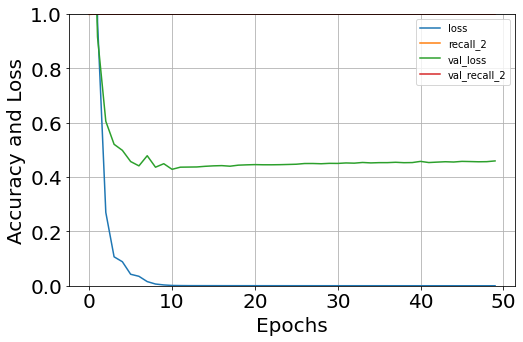

wandb: ERROR Error uploading "media/images/examples_32.png": CommError, File /var/folders/px/t6llprnj0m3fhqqbhbvkrynm0000gn/T/tmp0nu2f5lxwandb/3sbxsz7l-media/images/examples_32.png size shrank from 64306 to 0 while it was being uploaded.
Retry attempt failed:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connection.py", line 160, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/util/connection.py", line 84, in create_connection
    raise err
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/util/connection.py", line 74, in create_connection
    sock.connect(sa)
socket.timeout: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connectionpool.py", line 677, in url

wandb: Network error (ConnectTimeout), entering retry loop. See /Users/aarojas/Documents/Data_Science_Resources/Insight_20B/AAR_Insight_Project/Firearm_Detection/notebooks/wandb/debug.log for full traceback.
Retry attempt failed:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connection.py", line 160, in _new_conn
    (self._dns_host, self.port), self.timeout, **extra_kw
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/util/connection.py", line 84, in create_connection
    raise err
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/util/connection.py", line 74, in create_connection
    sock.connect(sa)
socket.timeout: timed out

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/envs/add_librosa/lib/python3.7/site-packages/urllib3/connectionpool.py", line 677, in urlopen
    chunked=chunked,
  Fi

In [93]:
pd.DataFrame(history3.history).plot(figsize=(8,5),fontsize=20)
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epochs',fontsize=20)
plt.ylabel('Accuracy and Loss',fontsize=20)
plt.show();
# plt.savefig('../reports/CNN_'+'alpha_'+str(alpha)+'_recall'+str(recall3)+'.png')

In [94]:
Y_predict3=model3.predict(X_test)

In [95]:
conf_mat3=sklearn.metrics.confusion_matrix(pd.DataFrame(Y_test_hot)[1],pd.DataFrame(Y_predict3).round()[1])

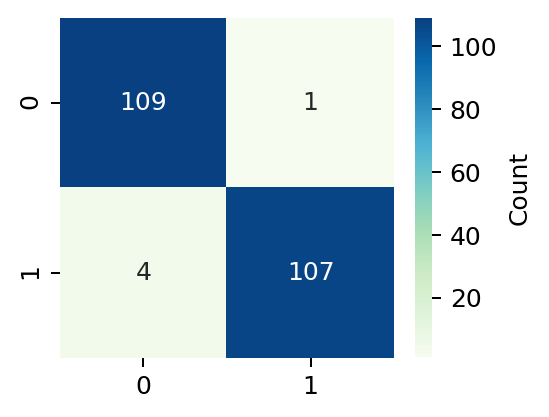

wandb: Network error resolved after 0:01:00.837354, resuming normal operation.
wandb: Network error resolved after 0:00:39.112100, resuming normal operation.
wandb: Network error resolved after 0:00:45.155394, resuming normal operation.
wandb: Network error resolved after 0:01:01.522028, resuming normal operation.
wandb: Network error resolved after 0:00:43.427673, resuming normal operation.
wandb: Network error resolved after 0:01:02.366990, resuming normal operation.
wandb: Network error resolved after 0:01:02.947708, resuming normal operation.
wandb: Network error resolved after 0:01:02.461096, resuming normal operation.
wandb: Network error resolved after 0:01:03.632566, resuming normal operation.
wandb: Network error resolved after 0:01:02.363238, resuming normal operation.
wandb: Network error resolved after 0:00:28.247441, resuming normal operation.
wandb: Network error resolved after 0:00:44.551081, resuming normal operation.
wandb: Network error resolved after 0:00:40.112866, 

In [96]:
df_cm = pd.DataFrame(conf_mat3, index = [i for i in "01"],
                  columns = [i for i in "01"])
plt.figure(figsize = (3,2.5),dpi=180)
sn.heatmap(df_cm, annot=True,annot_kws={"size": 10},cmap="GnBu",cbar_kws={'label': 'Count'},fmt='d')
# plt.savefig('../reports/figures/CNN_confusion_mat_'+str(recall3)+'_alpha_'+str(alpha)+'.png')